 **VaSt-ID: Novel Application for Variable Star Identification and Classification using Machine Learning
 <br>
Automated Classification and Identification of Variable Stars <br>
Luke Huang and Aiden Pan**

**Setup**

In [ ]:
import pandas as pd
import numpy as np
!pip install upsilon
import matplotlib.pyplot as plt
import seaborn as sn
import scipy as sp
#allow google drive files
from google.colab import drive
drive.mount('/content/drive')
import csv
!pip install idlsave
import idlsave
import os
from os import listdir
from os.path import isfile, join, splitext
import upsilon
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 MB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for upsilon: filename=upsilon-1.2.10-py3-none-any.whl size=43663344 sha256=f96125bd60910581b53c1a123f050c6a4798f6baa47ff6741ce3b5dedd06930a
  Stored in directory: /root/.cache/pip/wheels/a4/91/fc/497b8760493407c99ec94e978bb9e24ed95aba8865608e66dc
Successfully built upsilon
Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for idlsave: filename=IDLSave-1.0.0-py3-none-any.whl size=8975 sha256=8ebd7b16d2f9f97619d7c1dba8bf934b190406a852271d98fea8aed68ed25489
  Stored in directory: /root/.cache/pip/wheels/c1/18/e9/b6a0e64a652905887a69ab6dfa2ce74d67de27b2fd07c499ce
Successfully built idlsave
-------------------------------
* WARNI

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy as sp
#allow google drive files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Algorithms/Data Visualization**

In [ ]:
#Extract Cepheid Features

csv_folder = "/content/drive/MyDrive/Cepheid_csv"
dat_folder = "/content/drive/MyDrive/Cepheids/I"

i = 0
df_cepheid = pd.DataFrame(columns = ["amplitude", "cusum", "eta", "hl_amp_ratio", "kurtosis", "n_points", "period", "period_SNR", "period_log10FAP", "period_uncertainty", "phase_cusum", "phase_eta", "phi21", "phi31", "quartile31", "r21", "r31", "shapiro_w", "skewness", "slope_per10", "slope_per90", "stetson_k", "weighted_mean", "weighted_std"])
for files in os.listdir(dat_folder):
  df = pd.read_csv(dat_folder + '/' + files, sep='\s+', header=None)
  #df.to_csv(csv_folder + '/' + f"{i:03}" + '.csv', header=["day", "magnitude", "error"])
  # upsilon feature extractor
  date = np.array(df[df.columns[0]])
  mag = np.array(df[df.columns[1]])
  err = np.array(df[df.columns[2]])
  e_features = upsilon.ExtractFeatures(date, mag, err)
  e_features.run()
  features = e_features.get_features()
  features_as_list = list(features.values())
  #append the list to df_cepheid
  df_cepheid.loc[len(df_cepheid.index)] = features_as_list
  i = i+1
display(df_cepheid)

/usr/local/lib/python3.7/dist-packages/upsilon/extract_features/extract_features.py:61: UserWarning: The number of data points are less than 80.
  % min_n_data)
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.7/dist-packages/upsilon/extract_features/extract_features.py:204: RuntimeWarning: divide by zero encountered in log10
  np.log10(pLS.getSignificance(fx, fy, nout, oversampling)[jmax])


,amplitude,cusum,eta,hl_amp_ratio,kurtosis,n_points,period,period_SNR,period_log10FAP,period_uncertainty,...,quartile31,r21,r31,shapiro_w,skewness,slope_per10,slope_per90,stetson_k,weighted_mean,weighted_std
0,0.139922,0.054016,1.685181,0.689740,-1.306275,501.0,0.888940,118.479410,-90.925879,0.000527,...,0.19300,0.267298,0.058334,0.925925,-0.260822,-0.390879,0.370500,0.852754,16.826337,0.104747
1,0.174256,0.073633,1.341081,0.561768,-1.298039,520.0,1.076123,124.445286,-97.126921,0.000515,...,0.23950,0.268822,0.099978,0.904128,-0.368086,-0.536812,0.656172,0.827450,16.730834,0.130509
2,0.193796,0.094322,2.220331,1.009430,-1.269660,464.0,4.019356,108.680746,-70.568996,0.009599,...,0.27600,0.440840,0.212251,0.944940,0.044977,-1.593352,3.158823,0.864584,15.667769,0.155366
3,0.087945,0.111406,2.447260,0.704473,-1.064550,151.0,2.915100,45.366654,-23.116540,0.009949,...,0.11250,0.172759,0.008244,0.953602,-0.244752,-4.234337,4.008878,0.852777,15.625455,0.068664
4,0.233111,0.088953,2.401316,0.466815,-0.618671,489.0,1.612252,102.152039,-64.431553,0.001737,...,0.29800,0.490016,0.365151,0.919522,-0.685591,-0.806363,1.046887,0.755759,16.812762,0.204039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11610,0.120702,0.063489,2.440668,0.756278,-1.237043,494.0,2.550447,118.267408,-84.187995,0.004338,...,0.16250,0.402182,0.180575,0.942714,-0.176225,-2.329289,3.193710,0.849976,16.107246,0.094251
11611,0.224791,0.081363,2.209749,0.543419,-0.849748,506.0,2.050755,105.077658,-68.094833,0.003743,...,0.30475,0.527187,0.362690,0.948068,-0.448676,-1.115312,1.575539,0.779435,16.624962,0.200826
11612,0.183035,0.027481,1.251427,1.583797,-1.153359,654.0,10.020005,111.595979,-123.163852,0.082014,...,0.22775,0.144673,0.147852,0.938927,0.236942,-4.520869,3.378932,0.843824,13.992086,0.137513
11613,0.062670,0.079896,2.366635,1.039817,2.468780,710.0,2.035188,117.289210,-107.752547,0.003687,...,0.08775,0.188053,0.008700,0.918171,0.740385,-1.221282,0.979689,0.844687,15.762283,0.051316


In [ ]:
#get cepheid dataframe
df_cepheid.to_csv('/content/drive/MyDrive/Features_csvs/' + "cepheid_features" + '.csv', header=["amplitude", "cusum", "eta", "hl_amp_ratio", "kurtosis", "n_points", "period", "period_SNR", "period_log10FAP", "period_uncertainty", "phase_cusum", "phase_eta", "phi21", "phi31", "quartile31", "r21", "r31", "shapiro_w", "skewness", "slope_per10", "slope_per90", "stetson_k", "weighted_mean", "weighted_std"])

In [ ]:
#Extract Anomalous Cepheid Features

csv_folder = "/content/drive/MyDrive/Anomalous_Cepheid_csv"
dat_folder = "/content/drive/MyDrive/Anomalous_Cepheids/I"

i = 0
df_anomalous_cepheid = pd.DataFrame(columns = ["amplitude", "cusum", "eta", "hl_amp_ratio", "kurtosis", "n_points", "period", "period_SNR", "period_log10FAP", "period_uncertainty", "phase_cusum", "phase_eta", "phi21", "phi31", "quartile31", "r21", "r31", "shapiro_w", "skewness", "slope_per10", "slope_per90", "stetson_k", "weighted_mean", "weighted_std"])
for files in os.listdir(dat_folder):
  df = pd.read_csv(dat_folder + '/' + files, sep='\s+', header=None)
  #df.to_csv(csv_folder + '/' + f"{i:03}" + '.csv', header=["day", "magnitude", "error"])
  # upsilon feature extractor
  date = np.array(df[df.columns[0]])
  mag = np.array(df[df.columns[1]])
  err = np.array(df[df.columns[2]])
  e_features = upsilon.ExtractFeatures(date, mag, err)
  e_features.run()
  features = e_features.get_features()
  features_as_list = list(features.values())
  df_anomalous_cepheid.loc[len(df_anomalous_cepheid.index)] = features_as_list
  i = i+1
display(df_anomalous_cepheid)

/usr/local/lib/python3.8/dist-packages/upsilon/extract_features/extract_features.py:60: UserWarning: The number of data points are less than 80.
  warnings.warn('The number of data points are less than %d.'
/usr/local/lib/python3.8/dist-packages/upsilon/extract_features/extract_features.py:204: RuntimeWarning: divide by zero encountered in log10
  np.log10(pLS.getSignificance(fx, fy, nout, oversampling)[jmax])
/usr/local/lib/python3.8/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,amplitude,cusum,eta,hl_amp_ratio,kurtosis,n_points,period,period_SNR,period_log10FAP,period_uncertainty,...,quartile31,r21,r31,shapiro_w,skewness,slope_per10,slope_per90,stetson_k,weighted_mean,weighted_std
0,0.086685,0.042959,2.958738,1.079590,-1.350704,620.0,2.347010,116.666278,-120.178705,0.004903,...,0.12125,0.217711,0.037747,0.934914,0.101285,-1.790596,1.965931,0.880364,16.626680,0.063979
1,0.286993,0.157926,0.965514,0.509876,-1.032188,663.0,1.059168,108.132855,-100.369871,0.000915,...,0.41600,0.415955,0.238180,0.896051,-0.541886,-0.225890,0.201894,0.753287,17.145068,0.249761
2,0.191821,0.136095,2.022451,0.509924,-0.982209,514.0,0.800815,113.453237,-73.867453,0.000479,...,0.27400,0.369197,0.261477,0.939654,-0.433072,-0.216757,0.234659,0.765860,17.899166,0.167797
3,0.071811,0.097134,2.128570,0.831967,-1.066856,432.0,0.603981,117.116555,-73.436567,0.000217,...,0.09225,0.200694,0.018257,0.969245,-0.098080,-0.285336,0.309628,0.832279,17.632642,0.055507
4,0.222006,0.157693,1.847352,0.535798,-0.857756,683.0,0.834188,108.280848,-93.130774,0.000620,...,0.30000,0.461507,0.357548,0.939238,-0.501802,-0.189067,0.261616,0.747464,18.028256,0.197995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0.110127,0.048318,2.829410,0.720563,-1.401129,115.0,0.627985,42.003401,-18.086671,0.000422,...,0.15200,0.204892,0.101668,0.917040,-0.161358,-1.442101,2.181929,0.872582,14.275072,0.083284
383,0.209210,0.120401,2.509687,0.537909,-1.223851,90.0,0.424616,34.307360,-11.169585,0.000159,...,0.28600,0.297493,0.099851,0.927630,-0.298359,-0.267249,0.628933,0.788072,17.606232,0.165930
384,0.187698,0.077441,2.727021,0.509020,-1.203365,115.0,0.408025,39.977747,-16.325036,0.000208,...,0.27150,0.348310,0.130414,0.893767,-0.455921,-0.820656,0.884920,0.825739,14.829841,0.145116
385,0.163388,0.144663,2.301124,0.466349,-0.754154,13.0,0.961669,6.080057,0.000000,0.000776,...,0.07200,0.049707,0.111670,0.870914,-0.714809,-1.310772,3.753712,0.731724,13.751538,0.105694


In [ ]:
#get anomalous cepheid dataframe
df_anomalous_cepheid.to_csv('/content/drive/MyDrive/Features_csvs/' + "anomalous_cepheid_features" + '.csv', header=["amplitude", "cusum", "eta", "hl_amp_ratio", "kurtosis", "n_points", "period", "period_SNR", "period_log10FAP", "period_uncertainty", "phase_cusum", "phase_eta", "phi21", "phi31", "quartile31", "r21", "r31", "shapiro_w", "skewness", "slope_per10", "slope_per90", "stetson_k", "weighted_mean", "weighted_std"])

In [ ]:
#Extract Type 2 Cepheid Features
csv_folder = "/content/drive/MyDrive/Type2_Cepheid_csv"
dat_folder = "/content/drive/MyDrive/Type2_Cepheids/I"

i = 0
df_t2_cepheid = pd.DataFrame(columns = ["amplitude", "cusum", "eta", "hl_amp_ratio", "kurtosis", "n_points", "period", "period_SNR", "period_log10FAP", "period_uncertainty", "phase_cusum", "phase_eta", "phi21", "phi31", "quartile31", "r21", "r31", "shapiro_w", "skewness", "slope_per10", "slope_per90", "stetson_k", "weighted_mean", "weighted_std"])
for files in os.listdir(dat_folder):
  df = pd.read_csv(dat_folder + '/' + files, sep='\s+', header=None)
  #df.to_csv(csv_folder + '/' + f"{i:03}" + '.csv', header=["day", "magnitude", "error"])
  # upsilon feature extractor
  date = np.array(df[df.columns[0]])
  mag = np.array(df[df.columns[1]])
  err = np.array(df[df.columns[2]])
  e_features = upsilon.ExtractFeatures(date, mag, err)
  e_features.run()
  features = e_features.get_features()
  features_as_list = list(features.values())
  df_t2_cepheid.loc[len(df_t2_cepheid.index)] = features_as_list
  i = i+1
display(df_t2_cepheid)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.7/dist-packages/upsilon/extract_features/extract_features.py:61: UserWarning: The number of data points are less than 80.
  % min_n_data)


,amplitude,cusum,eta,hl_amp_ratio,kurtosis,n_points,period,period_SNR,period_log10FAP,period_uncertainty,...,quartile31,r21,r31,shapiro_w,skewness,slope_per10,slope_per90,stetson_k,weighted_mean,weighted_std
0,0.162254,0.065008,0.958930,0.965222,-1.427901,2289.0,1.060680,259.324465,-inf,0.000356,...,0.22700,0.207545,0.035456,0.918406,-0.017951,-0.314534,0.292429,0.879726,15.782491,0.117822
1,0.086331,0.133576,1.630471,1.639475,-1.121473,118.0,8.657072,46.918557,-17.500384,0.063541,...,0.10025,0.184627,0.062057,0.921079,0.426923,-21.141984,23.022932,0.853653,14.081097,0.062369
2,0.415623,0.115084,0.853978,2.829023,-1.272576,111.0,16.218106,43.710935,-16.773375,0.247662,...,0.54550,0.060084,0.056240,0.859316,0.529720,-15.677490,17.699178,0.800670,11.978982,0.289224
3,0.122599,0.045303,2.441703,0.625463,-1.523792,339.0,6.303868,108.405946,-59.654026,0.015081,...,0.18600,0.152049,0.067657,0.899170,-0.149744,-3.711298,3.622968,0.875911,16.468904,0.093516
4,0.133891,0.106845,2.150542,1.187834,-1.234774,574.0,1.299325,131.680818,-98.240003,0.000815,...,0.19350,0.327443,0.087645,0.947763,0.153603,-0.393203,0.446463,0.851107,18.118077,0.107015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,0.446224,0.108127,0.934291,1.442532,-1.598721,820.0,16.628946,142.866612,-167.787847,0.194139,...,0.66250,0.057585,0.060616,0.879387,0.089398,-3.682576,4.290277,0.917961,15.781552,0.314169
2003,0.062867,0.068514,2.195884,2.006663,-1.135785,516.0,6.937181,142.570276,-85.652437,0.026733,...,0.08600,0.142153,0.021022,0.921563,0.439034,-4.366208,4.514641,0.826797,14.781872,0.049468
2004,0.124204,0.053736,0.489331,0.917412,-1.407115,911.0,1.011621,205.989413,-169.821984,0.000272,...,0.18000,0.128826,0.060441,0.923001,-0.015661,-0.247766,0.262395,0.886765,15.178917,0.094709
2005,0.434615,0.345287,0.850741,22.373362,3.620942,172.0,3791.967180,8.645422,-10.610117,2843.975385,...,0.18950,0.630655,0.396632,0.722795,1.927599,-66.712853,95.385773,0.562573,11.999657,0.175959


In [ ]:
#get type 2 cepheid dataframe
df_t2_cepheid.to_csv('/content/drive/MyDrive/Features_csvs/' + "t2_cepheid_features" + '.csv', header=["amplitude", "cusum", "eta", "hl_amp_ratio", "kurtosis", "n_points", "period", "period_SNR", "period_log10FAP", "period_uncertainty", "phase_cusum", "phase_eta", "phi21", "phi31", "quartile31", "r21", "r31", "shapiro_w", "skewness", "slope_per10", "slope_per90", "stetson_k", "weighted_mean", "weighted_std"])

In [ ]:
#Extract RR Lyrae Features
csv_folder = "/content/drive/MyDrive/RR_Lyrae_csv"
dat_folder = "/content/drive/MyDrive/RR_Lyrae"

i = 0
df_rr_lyrae = pd.DataFrame(columns = ["amplitude", "cusum", "eta", "hl_amp_ratio", "kurtosis", "n_points", "period", "period_SNR", "period_log10FAP", "period_uncertainty", "phase_cusum", "phase_eta", "phi21", "phi31", "quartile31", "r21", "r31", "shapiro_w", "skewness", "slope_per10", "slope_per90", "stetson_k", "weighted_mean", "weighted_std"])
for files in os.listdir(dat_folder):
  df = pd.read_csv(dat_folder + '/' + files, sep='\s+', header=None)
  df.to_csv(csv_folder + '/' + f"{i:03}" + '.csv', header=["day", "magnitude", "error"])
  # upsilon feature extractor
  date = np.array(df[df.columns[0]])
  mag = np.array(df[df.columns[1]])
  err = np.array(df[df.columns[2]])
  e_features = upsilon.ExtractFeatures(date, mag, err)
  e_features.run()
  features = e_features.get_features()
  features_as_list = list(features.values())
  df_rr_lyrae.loc[len(df_rr_lyrae.index)] = features_as_list
  i = i+1
display(df_rr_lyrae)

/usr/local/lib/python3.7/dist-packages/upsilon/extract_features/extract_features.py:61: UserWarning: The number of data points are less than 80.
  % min_n_data)


,amplitude,cusum,eta,hl_amp_ratio,kurtosis,n_points,period,period_SNR,period_log10FAP,period_uncertainty,...,quartile31,r21,r31,shapiro_w,skewness,slope_per10,slope_per90,stetson_k,weighted_mean,weighted_std
0,0.276265,0.197430,2.527840,1.491946,-0.461035,90.0,0.627062,22.238570,-5.287681,0.000367,...,0.34175,0.392959,0.214491,0.980085,0.328008,-0.233294,0.217474,0.806967,19.061373,0.229704
1,0.240927,0.293796,0.623896,0.728927,-1.136925,67.0,0.502232,21.933618,-5.688542,0.001015,...,0.36450,0.417322,0.308681,0.928419,-0.349603,-0.363451,0.868183,0.817474,16.492732,0.217745
2,0.150046,0.159766,1.604015,1.274364,-1.119429,78.0,0.601392,22.791002,-6.007823,0.000328,...,0.20775,0.410032,0.183299,0.962489,0.126418,-0.632372,1.009670,0.858666,15.642787,0.124629
3,0.203624,0.155917,2.361050,1.065725,-1.050195,81.0,0.593491,25.588002,-7.426029,0.000383,...,0.27500,0.512174,0.316464,0.966626,0.088915,-0.526204,0.688338,0.844104,17.082685,0.170251
4,0.228139,0.209461,2.620638,0.889862,-1.058594,104.0,0.615096,29.077299,-11.953378,0.002197,...,0.33025,0.371300,0.200027,0.962498,-0.199359,-0.301419,0.399261,0.819216,18.165353,0.190073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11647,0.194914,0.115362,1.868725,0.550938,-0.888740,68.0,0.538392,18.697233,-4.387799,0.000255,...,0.25550,0.452294,0.290775,0.944484,-0.432694,-0.351947,0.662757,0.786121,15.250068,0.180799
11648,0.220449,0.196370,2.578054,0.769356,-0.208673,150.0,0.584049,30.457893,-10.305602,0.000418,...,0.24900,0.658919,0.377711,0.982735,0.169663,-0.189833,0.287975,0.736371,18.015572,0.211977
11649,0.096181,0.110500,2.714742,1.117799,-0.892057,124.0,0.751321,35.299321,-13.437592,0.000653,...,0.14000,0.309683,0.132991,0.975751,0.167982,-0.605549,0.725257,0.840986,17.549855,0.083123
11650,0.151298,0.135456,2.470037,1.183287,-1.528070,101.0,0.292909,30.220236,-14.245167,0.000248,...,0.23300,0.162758,0.094069,0.897182,0.114577,-0.503918,0.272336,0.908945,16.536814,0.113911


In [ ]:
#get rr lyrae dataframe
df_rr_lyrae.to_csv('/content/drive/MyDrive/Features_csvs/' + "rr_lyrae_features" + '.csv', header=["amplitude", "cusum", "eta", "hl_amp_ratio", "kurtosis", "n_points", "period", "period_SNR", "period_log10FAP", "period_uncertainty", "phase_cusum", "phase_eta", "phi21", "phi31", "quartile31", "r21", "r31", "shapiro_w", "skewness", "slope_per10", "slope_per90", "stetson_k", "weighted_mean", "weighted_std"])

In [ ]:
#Extract Mira Features
#csv_folder = "/content/drive/MyDrive/RR_Lyrae_csv"
dat_folder = "/content/drive/MyDrive/Miras"

i = 0
df_mira = pd.DataFrame(columns = ["amplitude", "cusum", "eta", "hl_amp_ratio", "kurtosis", "n_points", "period", "period_SNR", "period_log10FAP", "period_uncertainty", "phase_cusum", "phase_eta", "phi21", "phi31", "quartile31", "r21", "r31", "shapiro_w", "skewness", "slope_per10", "slope_per90", "stetson_k", "weighted_mean", "weighted_std"])
for files in os.listdir(dat_folder):
  df = pd.read_csv(dat_folder + '/' + files, sep='\s+', header=None)
  #df.to_csv(csv_folder + '/' + f"{i:03}" + '.csv', header=["day", "magnitude", "error"])
  # upsilon feature extractor
  date = np.array(df[df.columns[0]])
  mag = np.array(df[df.columns[1]])
  err = np.array(df[df.columns[2]])
  e_features = upsilon.ExtractFeatures(date, mag, err)
  e_features.run()
  features = e_features.get_features()
  features_as_list = list(features.values())
  df_mira.loc[len(df_mira.index)] = features_as_list
  i = i+1
display(df_mira)

#get mira dataframe
df_mira.to_csv('/content/drive/MyDrive/Features_csvs/' + "mira_features" + '.csv', header=["amplitude", "cusum", "eta", "hl_amp_ratio", "kurtosis", "n_points", "period", "period_SNR", "period_log10FAP", "period_uncertainty", "phase_cusum", "phase_eta", "phi21", "phi31", "quartile31", "r21", "r31", "shapiro_w", "skewness", "slope_per10", "slope_per90", "stetson_k", "weighted_mean", "weighted_std"])

/usr/local/lib/python3.7/dist-packages/upsilon/extract_features/extract_features.py:61: UserWarning: The number of data points are less than 80.
  % min_n_data)
/usr/local/lib/python3.7/dist-packages/upsilon/extract_features/extract_features.py:204: RuntimeWarning: divide by zero encountered in log10
  np.log10(pLS.getSignificance(fx, fy, nout, oversampling)[jmax])
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,amplitude,cusum,eta,hl_amp_ratio,kurtosis,n_points,period,period_SNR,period_log10FAP,period_uncertainty,...,quartile31,r21,r31,shapiro_w,skewness,slope_per10,slope_per90,stetson_k,weighted_mean,weighted_std
0,1.388508,0.411493,0.055619,1.101706,-1.523234,112.0,261.875555,42.101401,-18.343598,48.357702,...,2.0410,0.068373,0.021944,0.892877,-0.009941,-68.786972,131.568016,0.906194,11.768884,1.012474
1,1.515153,0.291769,0.033421,1.102582,-1.476774,877.0,408.816980,200.207958,-149.742048,43.015255,...,2.3530,0.171526,0.071627,0.912051,0.117966,-22.912097,51.770687,0.920207,14.234833,1.140313
2,0.585349,0.282344,0.126009,1.151719,2.704329,102.0,112.570189,32.961721,-10.025233,19.963186,...,0.8025,0.054515,0.133865,0.882851,1.146084,-97.436364,54.007209,0.781779,12.178373,0.494276
3,0.379730,0.443296,0.028798,6.618355,0.299924,77.0,104.313263,21.019946,-6.426682,14.494053,...,0.3210,0.410131,0.237041,0.787925,1.260940,-340.136333,248.391950,0.665291,15.321342,0.306193
4,0.376325,0.415793,0.163853,1.308788,-0.906587,75.0,102.830163,27.138721,-8.604519,155.253383,...,0.4255,0.088801,0.230134,0.962914,0.176411,-119.018538,95.967273,0.823593,15.508881,0.265503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9839,0.920754,0.307558,0.033588,0.849792,-1.026949,1054.0,328.006344,222.339809,-202.773088,26.613091,...,1.0550,0.098280,0.105262,0.960179,-0.215078,-17.272123,15.560651,0.843870,13.284463,0.649039
9840,0.990501,0.196564,0.020523,0.785501,-1.121684,1047.0,437.341792,222.978320,-204.632877,48.059538,...,1.2135,0.082349,0.163212,0.954676,-0.155222,-40.321930,59.516889,0.845645,14.153707,0.723555
9841,1.272452,0.293199,0.013546,0.516743,-1.298081,2115.0,320.061781,227.464583,-inf,25.147711,...,1.8435,0.147429,0.034465,0.914964,-0.349217,-6.856224,10.577000,0.843364,13.198182,0.993641
9842,0.944325,0.159120,0.029189,1.494976,-1.073071,1395.0,255.347582,225.920144,-242.247221,16.017826,...,1.1970,0.039610,0.043930,0.953454,0.287315,-10.922905,11.080800,0.840420,12.785299,0.704257


In [ ]:
#Extract Delta Scuti Features
dat_folder = "/content/drive/MyDrive/Delta_Scuti"

i = 0
df_deltaScuti = pd.DataFrame(columns = ["amplitude", "cusum", "eta", "hl_amp_ratio", "kurtosis", "n_points", "period", "period_SNR", "period_log10FAP", "period_uncertainty", "phase_cusum", "phase_eta", "phi21", "phi31", "quartile31", "r21", "r31", "shapiro_w", "skewness", "slope_per10", "slope_per90", "stetson_k", "weighted_mean", "weighted_std"])
for files in os.listdir(dat_folder):
  df = pd.read_csv(dat_folder + '/' + files, sep='\s+', header=None)
  #df.to_csv(csv_folder + '/' + f"{i:03}" + '.csv', header=["day", "magnitude", "error"])
  # upsilon feature extractor
  date = np.array(df[df.columns[0]])
  mag = np.array(df[df.columns[1]])
  err = np.array(df[df.columns[2]])
  e_features = upsilon.ExtractFeatures(date, mag, err)
  e_features.run()
  features = e_features.get_features()
  features_as_list = list(features.values())
  df_deltaScuti.loc[len(df_deltaScuti.index)] = features_as_list
  i = i+1
display(df_deltaScuti)

In [ ]:
#Extract Eclipsing Binary Features
dat_folder = "/content/drive/MyDrive/Eclipsing_Binaries_2"

i = 0
df_binary = pd.DataFrame(columns = ["amplitude", "cusum", "eta", "hl_amp_ratio", "kurtosis", "n_points", "period", "period_SNR", "period_log10FAP", "period_uncertainty", "phase_cusum", "phase_eta", "phi21", "phi31", "quartile31", "r21", "r31", "shapiro_w", "skewness", "slope_per10", "slope_per90", "stetson_k", "weighted_mean", "weighted_std"])
for files in os.listdir(dat_folder):
  df = pd.read_csv(dat_folder + '/' + files, sep='\s+', header=None)
  date = np.array(df[df.columns[0]])
  mag = np.array(df[df.columns[1]])
  err = np.array(df[df.columns[2]])
  e_features = upsilon.ExtractFeatures(date, mag, err)
  e_features.run()
  features = e_features.get_features()
  features_as_list = list(features.values())
  df_binary.loc[len(df_binary.index)] = features_as_list
  i = i+1
display(df_binary)

/usr/local/lib/python3.7/dist-packages/upsilon/extract_features/extract_features.py:61: UserWarning: The number of data points are less than 80.
  % min_n_data)


,amplitude,cusum,eta,hl_amp_ratio,kurtosis,n_points,period,period_SNR,period_log10FAP,period_uncertainty,...,quartile31,r21,r31,shapiro_w,skewness,slope_per10,slope_per90,stetson_k,weighted_mean,weighted_std
0,0.016835,0.046130,2.555038,3.083939,45.322569,615.0,5.818586,14.084729,-1.557809,0.022938,...,0.0280,0.903976,0.944760,0.523065,5.708940,-1.706365,1.741106,0.511915,17.794951,0.047688
1,0.026294,0.054206,2.096805,1.277849,5.266688,615.0,1.623742,48.817503,-20.547850,0.002975,...,0.0420,0.702095,0.555249,0.932250,0.222999,-0.499267,0.480175,0.694356,17.989811,0.040400
2,0.114009,0.102739,2.787106,1.402696,-0.069904,615.0,0.408444,91.301246,-79.043653,0.000151,...,0.1460,0.177808,0.090527,0.972709,0.577324,-0.084767,0.071435,0.801341,18.850080,0.098096
3,0.074959,0.132574,2.957187,1.537986,13.032849,612.0,0.683114,42.860477,-15.171863,0.000369,...,0.1340,0.632787,0.372050,0.885929,2.093434,-0.052096,0.065802,0.769544,19.393124,0.119024
4,0.178771,0.273472,4.638817,2.949596,11.197242,615.0,2.612356,53.299520,-26.046652,0.005391,...,0.1465,0.781404,0.659380,0.662058,3.006364,-0.241607,0.272309,0.711987,19.584374,0.191357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18428,0.027984,0.215605,0.269123,2.690215,-0.212723,337.0,200.197188,67.468538,-34.150209,31.204825,...,0.0380,0.552257,0.148316,0.913485,0.846400,-220.852667,248.747314,0.762560,15.528450,0.026488
18429,0.079152,0.135312,2.468099,1.734638,4.073569,340.0,2.509594,36.226268,-12.041309,0.005008,...,0.1135,0.411239,0.411524,0.871062,1.641243,-0.559393,0.532771,0.702428,19.409239,0.110372
18430,0.009185,0.135928,1.584799,0.844303,-0.526235,199.0,62.032932,16.912291,-2.743104,2.625798,...,0.0230,0.373713,0.024041,0.990492,-0.122685,-110.072512,170.333965,0.819822,16.823265,0.015097
18431,0.181755,0.281324,5.183304,3.150328,17.267668,662.0,2.230411,43.872350,-20.279065,0.003373,...,0.1305,0.698426,0.684981,0.550467,3.879872,-0.188797,0.224504,0.688669,19.565561,0.184469


In [ ]:
#get eclipsing binary dataframe
df_binary.to_csv('/content/drive/MyDrive/Features_csvs/' + "eb_features" + '.csv', header=["amplitude", "cusum", "eta", "hl_amp_ratio", "kurtosis", "n_points", "period", "period_SNR", "period_log10FAP", "period_uncertainty", "phase_cusum", "phase_eta", "phi21", "phi31", "quartile31", "r21", "r31", "shapiro_w", "skewness", "slope_per10", "slope_per90", "stetson_k", "weighted_mean", "weighted_std"])

In [ ]:
#get non-variables
dat_folder = "/content/drive/MyDrive/Non_Variables"

i = 0
df_non = pd.DataFrame(columns = ["amplitude", "cusum", "eta", "hl_amp_ratio", "kurtosis", "n_points", "period", "period_SNR", "period_log10FAP", "period_uncertainty", "phase_cusum", "phase_eta", "phi21", "phi31", "quartile31", "r21", "r31", "shapiro_w", "skewness", "slope_per10", "slope_per90", "stetson_k", "weighted_mean", "weighted_std"])
for files in os.listdir(dat_folder):
  if os.stat(dat_folder + '/' + files).st_size != 0:
    df = pd.read_csv(dat_folder + '/' + files, sep='\s+', header=None)
    date = np.array(df[df.columns[0]])
    mag = np.array(df[df.columns[1]])
    err = np.array(df[df.columns[2]])
    e_features = upsilon.ExtractFeatures(date, mag, err)
    e_features.run()
    features = e_features.get_features()
    features_as_list = list(features.values())
    df_non.loc[len(df_non.index)] = features_as_list
    i = i+1

/usr/local/lib/python3.7/dist-packages/upsilon/extract_features/extract_features.py:61: UserWarning: The number of data points are less than 80.
  % min_n_data)


,amplitude,cusum,eta,hl_amp_ratio,kurtosis,n_points,period,period_SNR,period_log10FAP,period_uncertainty,...,quartile31,r21,r31,shapiro_w,skewness,slope_per10,slope_per90,stetson_k,weighted_mean,weighted_std
0,0.071033,0.245804,4.067435,1.238462,37.246465,201.0,0.079907,8.440145,-1.830549e-11,3.097782e-06,...,0.17600,0.079837,0.321080,0.741749,4.249723,-0.017178,0.018135,0.780965,19.799729,0.136530
1,0.088050,0.224538,2.523993,1.199718,3.658312,365.0,0.043032,12.558501,-7.360594e-01,1.088162e-06,...,0.25300,0.486743,0.059482,0.931026,1.250560,-0.003379,0.003283,0.761358,20.083597,0.198983
2,0.173574,0.514554,4.059561,1.240149,5.878284,336.0,0.045716,9.437303,-6.887600e-03,9.838805e-07,...,0.56050,0.721640,0.080333,0.863702,1.891974,-0.002147,0.001250,0.740834,20.954513,0.365819
3,0.140611,0.375201,3.140617,1.043854,6.854808,364.0,0.032024,10.765028,-1.731236e-01,4.821188e-07,...,0.42625,0.055887,0.286670,0.904447,1.645131,-0.001860,0.001404,0.739677,20.729832,0.314645
4,0.089583,0.235529,2.151371,1.079106,2.140337,369.0,0.039024,12.281391,-6.387463e-01,7.158991e-07,...,0.30700,0.303371,0.261536,0.966938,0.734427,-0.002705,0.003097,0.772435,20.254453,0.218925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9424,0.003468,0.087674,1.957578,1.055253,0.952120,374.0,0.072821,9.729859,-1.805738e-02,3.116225e-06,...,0.01300,0.342416,0.153239,0.989468,-0.202749,-0.092549,0.102725,0.785551,16.452770,0.010033
9425,0.007679,0.088733,2.229852,1.017069,2.529515,231.0,0.221674,9.755999,-2.014717e-02,2.887728e-05,...,0.01950,0.227956,0.154478,0.962837,0.277939,-0.324350,0.372092,0.730840,17.245921,0.017343
9426,0.136130,0.231759,0.038245,2.188570,-0.696611,377.0,531.794891,108.458877,-5.970809e+01,4.963419e+02,...,0.13700,0.256134,0.029949,0.933142,0.595381,-452.733636,492.232500,0.767735,14.259756,0.095583
9427,0.004582,0.085901,2.025060,0.993579,3.863992,344.0,0.269127,13.864305,-1.255905e+00,4.256452e-05,...,0.01300,0.297965,0.169933,0.957901,-0.783554,-0.332089,0.351977,0.772232,16.505416,0.010960


In [ ]:
#get non-variable dataframe
df_non.to_csv('/content/drive/MyDrive/Features_csvs/' + "non_features" + '.csv', header=["amplitude", "cusum", "eta", "hl_amp_ratio", "kurtosis", "n_points", "period", "period_SNR", "period_log10FAP", "period_uncertainty", "phase_cusum", "phase_eta", "phi21", "phi31", "quartile31", "r21", "r31", "shapiro_w", "skewness", "slope_per10", "slope_per90", "stetson_k", "weighted_mean", "weighted_std"])

<ipython-input-2-633c7de5de4d>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tot = df_tot.append(df_t2)
<ipython-input-2-633c7de5de4d>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tot = df_tot.append(df_rr)
<ipython-input-2-633c7de5de4d>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tot = df_tot.append(df_mir)
<ipython-input-2-633c7de5de4d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tot = df_tot.append(df_hb)
<ipython-input-2-633c7de5de4d>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tot = df_tot.append(df_delt

,Class,amplitude,cusum,eta,hl_amp_ratio,kurtosis,n_points,period,period_SNR,period_uncertainty,...,quartile31,r21,r31,shapiro_w,skewness,slope_per10,slope_per90,stetson_k,weighted_mean,weighted_std
0,1,0.139922,0.054016,1.685181,0.689740,-1.306275,501.0,0.888940,118.479410,0.000527,...,0.1930,0.267298,0.058334,0.925925,-0.260822,-0.390879,0.370500,0.852754,16.826337,0.104747
1,1,0.174256,0.073633,1.341081,0.561768,-1.298039,520.0,1.076123,124.445286,0.000515,...,0.2395,0.268822,0.099978,0.904128,-0.368086,-0.536812,0.656172,0.827450,16.730834,0.130509
2,1,0.193796,0.094322,2.220331,1.009430,-1.269660,464.0,4.019356,108.680746,0.009599,...,0.2760,0.440840,0.212251,0.944940,0.044977,-1.593352,3.158823,0.864584,15.667769,0.155366
3,1,0.087945,0.111406,2.447260,0.704473,-1.064550,151.0,2.915100,45.366654,0.009949,...,0.1125,0.172759,0.008244,0.953602,-0.244752,-4.234337,4.008878,0.852777,15.625455,0.068664
4,1,0.233111,0.088953,2.401316,0.466815,-0.618671,489.0,1.612252,102.152039,0.001737,...,0.2980,0.490016,0.365151,0.919522,-0.685591,-0.806363,1.046887,0.755759,16.812762,0.204039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9424,9,0.003468,0.087674,1.957578,1.055253,0.952120,374.0,0.072821,9.729859,0.000003,...,0.0130,0.342416,0.153239,0.989468,-0.202749,-0.092549,0.102725,0.785551,16.452770,0.010033
9425,9,0.007679,0.088733,2.229852,1.017069,2.529515,231.0,0.221674,9.755999,0.000029,...,0.0195,0.227956,0.154478,0.962837,0.277939,-0.324350,0.372092,0.730840,17.245921,0.017343
9426,9,0.136130,0.231759,0.038245,2.188570,-0.696611,377.0,531.794891,108.458877,496.341899,...,0.1370,0.256134,0.029949,0.933142,0.595381,-452.733636,492.232500,0.767735,14.259756,0.095583
9427,9,0.004582,0.085901,2.025060,0.993579,3.863992,344.0,0.269127,13.864305,0.000043,...,0.0130,0.297965,0.169933,0.957901,-0.783554,-0.332089,0.351977,0.772232,16.505416,0.010960


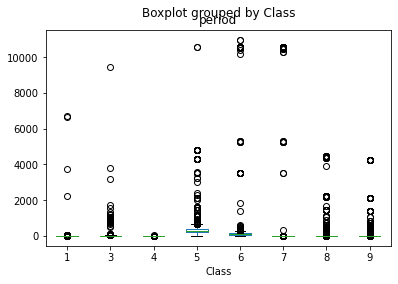

In [ ]:
df_tot = pd.read_csv("/content/drive/MyDrive/Features_csvs/cepheid_features.csv")
df_tot.insert(0, "Class", 1) # cepheids - 1
#df_anomalous = pd.read_csv("/content/drive/MyDrive/Features_csvs/anomalous_cepheid_features.csv")
#df_anomalous.insert(0, "Class", 2) #anomalous - 2
#df_tot = df_tot.append(df_anomalous)
df_t2 = pd.read_csv("/content/drive/MyDrive/Features_csvs/t2_cepheid_features.csv")
df_t2.insert(0, "Class", 3) #t2 - 3
df_tot = df_tot.append(df_t2)
df_rr = pd.read_csv("/content/drive/MyDrive/Features_csvs/rr_lyrae_features.csv")
df_rr.insert(0, "Class", 4) #rr - 4
df_tot = df_tot.append(df_rr)
df_mir = pd.read_csv("/content/drive/MyDrive/Features_csvs/mira_features.csv")
df_mir.insert(0, "Class", 5) #mira - 5
df_tot = df_tot.append(df_mir)
df_hb = pd.read_csv("/content/drive/MyDrive/Features_csvs/heartbeat_features.csv")
df_hb.insert(0, "Class", 6) #hearbeat - 6
df_tot = df_tot.append(df_hb)
df_delta = pd.read_csv("/content/drive/MyDrive/Features_csvs/delta_features.csv")
df_delta.insert(0, "Class", 7) #delta - 7
df_tot = df_tot.append(df_delta)
df_eb = pd.read_csv("/content/drive/MyDrive/Features_csvs/eb_features.csv")
df_eb.insert(0, "Class", 8) #eclipsing - 8
df_tot = df_tot.append(df_eb)
df_non = pd.read_csv("/content/drive/MyDrive/Features_csvs/non_features.csv")
df_non.insert(0, "Class", 9) #non-variable - 9
df_tot = df_tot.append(df_non)
df_tot.drop(df_tot[(df_tot['n_points'] < 40)].index, inplace=True)
#df_tot = df_tot.append(df_hb)
df_tot.drop(df_tot.columns[1], axis=1, inplace = True) #drop title file form previous csv
df_tot.drop(df_tot.columns[9], axis=1, inplace = True) #drop log10FAP, was faulty and returned NaN
df_period = df_tot[['period']]
df_period.insert(0, "Class", df_tot[['Class']])
#df_period.drop(df_period[(df_period["period"] > 1000)].index, inplace = True)
df_period.boxplot(by ='Class', column =['period'], grid = False)
df_tot

#df_tot

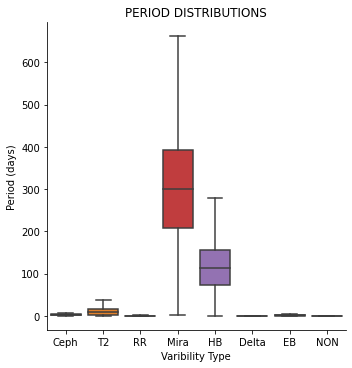

In [ ]:
#period distributions

g = sn.catplot(x="Class", y="period",
            data=df_tot,
            kind="box",
            sym="")
g.set_xticklabels(['Ceph', 'T2', 'RR', 'Mira', 'HB', 'Delta', 'EB', 'NON'])
#g.fig.suptitle('DISTRIBUTION OF CALCULATED PERIODS')
g.set_axis_labels("", "Period (days)")
g.set(xlabel ="Varibility Type", ylabel = "Period (days)", title ='PERIOD DISTRIBUTIONS')


In [ ]:
#get csv for all classes
df_tot.to_csv('/content/drive/MyDrive/Features_csvs/' + "total_features" + '.csv', header=["Class", "amplitude", "cusum", "eta", "hl_amp_ratio", "kurtosis", "n_points", "period", "period_SNR", "period_uncertainty", "phase_cusum", "phase_eta", "phi21", "phi31", "quartile31", "r21", "r31", "shapiro_w", "skewness", "slope_per10", "slope_per90", "stetson_k", "weighted_mean", "weighted_std"])

In [ ]:
#create deep copy of df_tot for anomalous cepheid model
df_tot2 = df_tot.copy()
display(df_tot2)

,Class,amplitude,cusum,eta,hl_amp_ratio,kurtosis,n_points,period,period_SNR,period_uncertainty,...,quartile31,r21,r31,shapiro_w,skewness,slope_per10,slope_per90,stetson_k,weighted_mean,weighted_std
0,1,0.139922,0.054016,1.685181,0.689740,-1.306275,501.0,0.888940,118.479410,0.000527,...,0.1930,0.267298,0.058334,0.925925,-0.260822,-0.390879,0.370500,0.852754,16.826337,0.104747
1,1,0.174256,0.073633,1.341081,0.561768,-1.298039,520.0,1.076123,124.445286,0.000515,...,0.2395,0.268822,0.099978,0.904128,-0.368086,-0.536812,0.656172,0.827450,16.730834,0.130509
2,1,0.193796,0.094322,2.220331,1.009430,-1.269660,464.0,4.019356,108.680746,0.009599,...,0.2760,0.440840,0.212251,0.944940,0.044977,-1.593352,3.158823,0.864584,15.667769,0.155366
3,1,0.087945,0.111406,2.447260,0.704473,-1.064550,151.0,2.915100,45.366654,0.009949,...,0.1125,0.172759,0.008244,0.953602,-0.244752,-4.234337,4.008878,0.852777,15.625455,0.068664
4,1,0.233111,0.088953,2.401316,0.466815,-0.618671,489.0,1.612252,102.152039,0.001737,...,0.2980,0.490016,0.365151,0.919522,-0.685591,-0.806363,1.046887,0.755759,16.812762,0.204039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9424,9,0.003468,0.087674,1.957578,1.055253,0.952120,374.0,0.072821,9.729859,0.000003,...,0.0130,0.342416,0.153239,0.989468,-0.202749,-0.092549,0.102725,0.785551,16.452770,0.010033
9425,9,0.007679,0.088733,2.229852,1.017069,2.529515,231.0,0.221674,9.755999,0.000029,...,0.0195,0.227956,0.154478,0.962837,0.277939,-0.324350,0.372092,0.730840,17.245921,0.017343
9426,9,0.136130,0.231759,0.038245,2.188570,-0.696611,377.0,531.794891,108.458877,496.341899,...,0.1370,0.256134,0.029949,0.933142,0.595381,-452.733636,492.232500,0.767735,14.259756,0.095583
9427,9,0.004582,0.085901,2.025060,0.993579,3.863992,344.0,0.269127,13.864305,0.000043,...,0.0130,0.297965,0.169933,0.957901,-0.783554,-0.332089,0.351977,0.772232,16.505416,0.010960


ACCURACY OF THE MODEL:  0.985663082437276
Precision: 0.9856326561666032
Recall: 0.985663082437276
F1: 0.9856003795340028
              precision    recall  f1-score   support

        ceph       0.97      0.97      0.97      2121
          t2       0.96      0.88      0.92       397
          rr       0.98      0.99      0.98      2244
        mira       1.00      1.00      1.00      1823
          hb       0.96      0.94      0.95       191
       delta       1.00      1.00      1.00      4687
          eb       0.99      0.98      0.99      3523
         non       0.98      0.99      0.98      1754

    accuracy                           0.99     16740
   macro avg       0.98      0.97      0.97     16740
weighted avg       0.99      0.99      0.99     16740

{'classical cepheids': {'precision': 0.9694978883153449, 'recall': 0.974068835454974, 'f1-score': 0.9717779868297272, 'support': 2121}, 'type 2 cepheids': {'precision': 0.958904109589041, 'recall': 0.8816120906801007, 'f1-score'

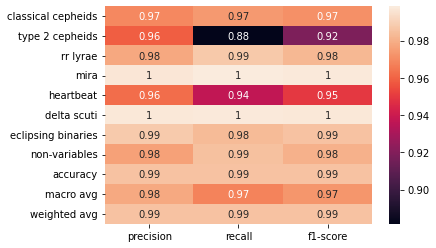

In [ ]:
y = df_tot["Class"]
X = df_tot.drop("Class", axis=1)
X = X.iloc[: , 1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
np.random.seed(69)
clf = RandomForestClassifier(n_estimators = 100,random_state=69)
label_encoder = preprocessing.LabelEncoder()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#df = pd.DataFrame(y_pred, columns = ['ouput']) # print out prediction, testing code
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred, target_names=["ceph", "t2", "rr", "mira", "hb", "delta", "eb", "non"]))
clf_report = classification_report(y_test, y_pred, target_names=["classical cepheids", "type 2 cepheids", "rr lyrae", "mira", "heartbeat", "delta scuti", "eclipsing binaries", "non-variables"], output_dict=True)
sn.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
print(clf_report)

       Ceph   T2    RR  Mira   HB  Delta    EB   NON
Ceph   2066   12    33     0    0      1     6     3
T2       34  350     6     6    0      0     1     0
RR       16    0  2216     0    0      9     3     0
Mira      0    1     1  1820    1      0     0     0
HB        2    0     0     0  179      0     9     1
Delta     3    0     6     0    1   4676     0     1
EB        7    2     4     0    5      3  3465    37
NON       3    0     0     0    0      0    23  1728


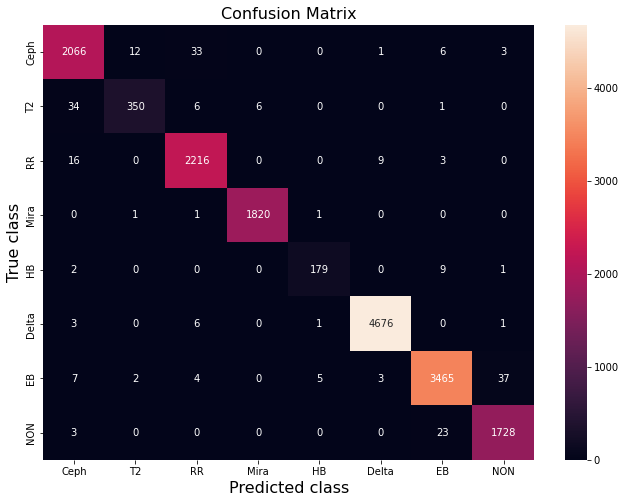

In [ ]:
#confusion matrix

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (11, 8))

confusion_matrix_as_2d = metrics.confusion_matrix(y_test, y_pred)
classes_list = ["Ceph", "T2", "RR", "Mira", "HB", "Delta", "EB", "NON"]
df_cm = pd.DataFrame(confusion_matrix_as_2d, index = classes_list, columns = classes_list)
#plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, ax=ax, fmt='g')
label_font = {'size':'16'}
ax.set_xlabel('Predicted class', fontdict=label_font);
ax.set_ylabel('True class', fontdict=label_font);
ax.set_title('Confusion Matrix', fontdict=label_font);
print(df_cm)

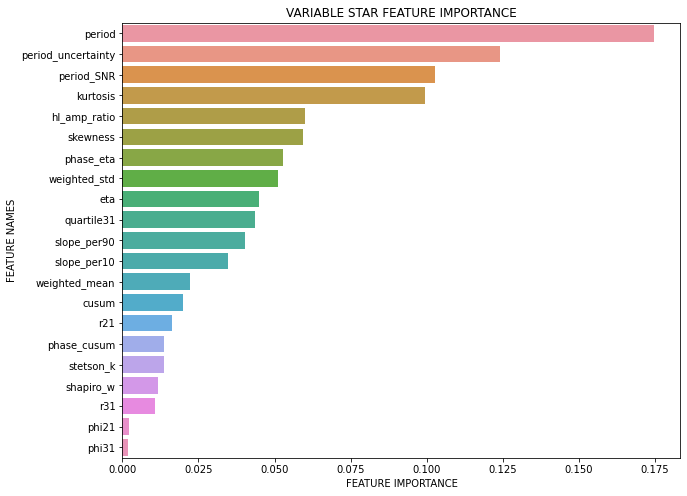

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sn.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(clf.feature_importances_, X.columns, 'VARIABLE STAR ')


In [ ]:
#create model for anomalous cepheids
df_an_model = df_tot.sample(n=387)
df_tot2 = df_tot2[df_tot2.Class == 2]
df_an_model = df_an_model.append(df_tot2)
df_an_model['Class'] = df_an_model['Class'].replace([3, 4, 5, 6, 7, 8, 9], 1)
y = df_an_model["Class"]
X = df_an_model.drop("Class", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
clf = RandomForestClassifier(n_estimators = 100)
label_encoder = preprocessing.LabelEncoder()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred, target_names=["an", "not an"]))

ACCURACY OF THE MODEL:  0.9270833333333334
Precision: 0.9232397504456328
Recall: 0.9270833333333334
F1: 0.9233632734530938
              precision    recall  f1-score   support

          an       0.94      0.98      0.96        82
      not an       0.82      0.64      0.72        14

    accuracy                           0.93        96
   macro avg       0.88      0.81      0.84        96
weighted avg       0.92      0.93      0.92        96



        an  not an
an      80       2
not an   5       9


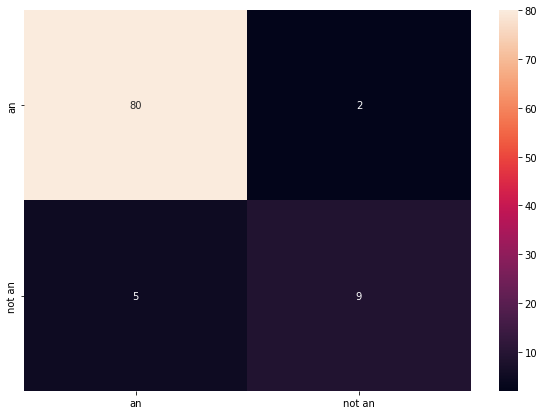

In [ ]:
#confusion matrix

confusion_matrix_as_2d = metrics.confusion_matrix(y_test, y_pred)
classes_list = ["an", "not an"]
df_cm = pd.DataFrame(confusion_matrix_as_2d, index = classes_list, columns = classes_list)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='g')
print(df_cm)

**Pickle the model for app**

In [ ]:
from flask import Flask,request, url_for, redirect, render_template, jsonify
import pandas as pd
import pickle
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/total_features.csv')
y = df["Class"]
X = df.drop("Class", axis=1)
X = X.iloc[: , 1:]
np.random.seed(69)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
clf = RandomForestClassifier(n_estimators = 100, random_state=69)
clf.fit(X_train, y_train)

pickle.dump(clf, open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl', 'rb'))

**ASAS-SN HBS Search**

In [ ]:
#get asas-sn data files here
#not shown here but the above model was used to predict ASAS-SN classes
df_pred = pd.read_csv('/content/drive/MyDrive/asassn_pred.csv')
df_pred

,Unnamed: 0,Class
0,0,1
1,1,8
2,2,1
3,3,8
4,4,8
...,...,...
591361,591361,8
591362,591362,8
591363,591363,8
591364,591364,9


In [ ]:
df_hbs = df_pred.loc[df_pred['Class'] == 6]
print(df_hbs)

        Unnamed: 0  Class
1206          1206      6
2027          2027      6
2196          2196      6
3565          3565      6
3697          3697      6
...            ...    ...
588554      588554      6
589387      589387      6
589751      589751      6
590322      590322      6
590844      590844      6

[866 rows x 2 columns]


In [ ]:
df_hbs.drop(columns =['Unnamed: 0'])

,Class
1206,6
2027,6
2196,6
3565,6
3697,6
...,...
588554,6
589387,6
589751,6
590322,6


In [ ]:
df_hbs.to_csv('/content/drive/MyDrive/asassn_866_hbs' + '.csv')

In [ ]:
df_asas = pd.read_csv('/content/drive/MyDrive/ASASSN_csvs.csv')


In [ ]:
df_asas

,Unnamed: 0,starID,amplitude,cusum,eta,hl_amp_ratio,kurtosis,n_points,period,period_SNR,...,quartile31,r21,r31,shapiro_w,skewness,slope_per10,slope_per90,stetson_k,weighted_mean,weighted_std
0,0,ASASSN-VJ150435.21-152925.0,0.284108,0.087111,2.005946,0.729657,-0.821236,202,397.724152,69.591692,...,0.33925,0.292617,0.094800,0.974068,-0.218900,-203.162778,153.440397,0.834948,11.957748,0.199932
1,1,ASASSN-VJ185047.14-050912.4,0.042304,0.298202,1.436583,0.589314,1.043601,43,39.608356,7.824234,...,0.06100,0.567939,0.093474,0.929213,-1.002244,-134.015909,206.206389,0.731943,12.973077,0.054008
2,2,ASASSN-VJ182602.98-591435.3,0.196940,0.183557,1.637045,0.515356,0.056989,263,0.581162,62.414921,...,0.25800,0.519542,0.238202,0.958793,-0.706072,-0.143833,0.131194,0.705227,15.360472,0.191060
3,3,ASASSN-VJ074836.15-141251.7,0.237074,0.196152,2.281937,1.943789,-0.352771,244,0.171460,78.566201,...,0.26725,0.290334,0.094634,0.943546,0.597939,-0.056971,0.034039,0.799136,15.748924,0.186697
4,4,ASASSN-VJ170253.54-653731.3,0.066032,0.102186,2.077950,1.476635,0.606229,284,1.943527,32.050903,...,0.11925,0.689562,0.111513,0.965036,0.743744,-0.399954,0.436177,0.775932,15.266748,0.100003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591361,591361,ASASSN-VJ175801.83-265109.7,0.035506,0.116454,2.064015,3.012721,11.861440,176,0.615503,10.234630,...,0.03725,0.665040,0.593756,0.650093,3.160262,-0.638354,0.404736,0.550168,14.323682,0.064857
591362,591362,ASASSN-VJ171210.30-323418.4,0.451197,0.068042,1.796516,1.265276,0.063425,185,0.997127,14.620811,...,0.05500,0.523499,0.146490,0.987252,0.286964,-0.255891,0.402140,0.786159,12.449584,0.043824
591363,591363,ASASSN-VJ175540.83-314632.9,0.338539,14.756044,577.838250,2.528105,-1.449698,462,0.034407,10.357217,...,2.22450,0.111760,0.454548,0.886410,0.217509,-0.000748,0.000553,0.506092,14.464361,0.066609
591364,591364,ASASSN-VJ162018.54-534041.6,0.005554,0.067943,1.927076,0.749197,2.659431,178,0.047178,8.565122,...,0.01475,0.388053,0.454806,0.966150,-0.606464,-0.096332,0.081662,0.746840,13.272000,0.012817


In [ ]:
df_asas.insert(0, "Pred", df_pred["Class"])

In [ ]:
df_asas.to_csv('/content/drive/MyDrive/full_asas_pred' + '.csv')

In [ ]:
df_asas

In [ ]:
df_866hbs = df_asas.loc[df_asas['Pred'] == 6]
df_866hbs.drop(columns=['Unnamed: 0'])
print(df_866hbs)

        Pred  Unnamed: 0                       starID  amplitude     cusum  \
1206       6        1206  ASASSN-VJ055119.86-695151.8   0.099850  0.104652   
2027       6        2027  ASASSN-VJ054530.79-691326.8   0.233627  0.174297   
2196       6        2196  ASASSN-VJ051916.67-675151.6   0.053844  0.095525   
3565       6        3565  ASASSN-VJ045503.34-672221.1   0.030381  0.042299   
3697       6        3697  ASASSN-VJ195920.86+392043.0   0.031765  0.030855   
...      ...         ...                          ...        ...       ...   
588554     6      588554  ASASSN-VJ053346.70-695434.1   0.049769  0.061740   
589387     6      589387  ASASSN-VJ053227.17-705005.2   0.008763  0.037085   
589751     6      589751  ASASSN-VJ044934.74+473054.8   0.016178  0.036456   
590322     6      590322  ASASSN-VJ045417.65-671159.4   0.092403  0.052657   
590844     6      590844  ASASSN-VJ183914.87+320816.9   0.071914  0.042874   

             eta  hl_amp_ratio    kurtosis  n_points       peri

In [ ]:
df_866hbs.to_csv('/content/drive/MyDrive/asassn_866_hbs' + '.csv')